**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
os.chdir("C:\\Users\\tirth\\Technocolabs\\project 2\\Data set")

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'graduate school.1',
 'high school.1',
 'others.1',
 'university.1']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [6]:
params={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [7]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rf, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [8]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  1.8min finished
C:\Users\tirth\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             iid=False,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [9]:
cv_df = pd.DataFrame(cv.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.094996,0.007866,0.007228,0.000829,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.99981,0.99999,0.999788,0.999623,0.999803,1.302811e-04,16,0.999801,0.999983,0.999820,0.999785,0.999847,7.961377e-05
1,0.625327,0.182082,0.030419,0.010472,3,50,"{'max_depth': 3, 'n_estimators': 50}",1.00000,1.00000,1.000000,1.000000,1.000000,8.782916e-08,14,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
2,1.293037,0.374154,0.048622,0.015711,3,100,"{'max_depth': 3, 'n_estimators': 100}",1.00000,1.00000,1.000000,1.000000,1.000000,5.551115e-17,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,2.180668,0.159613,0.122672,0.045029,3,200,"{'max_depth': 3, 'n_estimators': 200}",1.00000,1.00000,1.000000,1.000000,1.000000,7.850462e-17,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,0.264291,0.028295,0.015209,0.001635,6,10,"{'max_depth': 6, 'n_estimators': 10}",1.00000,1.00000,0.999999,0.999908,0.999977,3.953148e-05,15,1.000000,1.000000,0.999999,0.999970,0.999992,1.299585e-05
5,0.922425,0.236396,0.031665,0.009041,6,50,"{'max_depth': 6, 'n_estimators': 50}",1.00000,1.00000,1.000000,1.000000,1.000000,7.850462e-17,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,1.715470,0.229112,0.069564,0.025915,6,100,"{'max_depth': 6, 'n_estimators': 100}",1.00000,1.00000,1.000000,1.000000,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
7,3.373383,0.095125,0.133055,0.055854,6,200,"{'max_depth': 6, 'n_estimators': 200}",1.00000,1.00000,1.000000,1.000000,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,0.238041,0.076858,0.008246,0.001117,9,10,"{'max_depth': 9, 'n_estimators': 10}",1.00000,1.00000,1.000000,1.000000,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,0.874398,0.217481,0.030831,0.011960,9,50,"{'max_depth': 9, 'n_estimators': 50}",1.00000,1.00000,1.000000,1.000000,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


**Find the best hyperparameters from the cross-validation.**

In [10]:

hyperparameters=cv.best_params_
hyperparameters

{'max_depth': 3, 'n_estimators': 100}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [11]:
# Create a 5x5 grid
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
z = np.arange(1,17).reshape(4,4)
z

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [12]:
# Set color map to `plt.cm.jet`
cp=plt.cm.jet

Text(0, 0.5, 'Y coordinate')

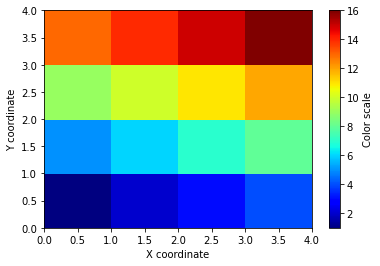

In [13]:
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx, yy, z, cmap=cp)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [14]:
# Create a dataframe of the feature names and importance
imp_features=pd.DataFrame({'Feature_name':features_response[:-1],'Importance':cv.best_estimator_.feature_importances_})
imp_features.head()

,Feature_name,Importance
0,LIMIT_BAL,0.048177
1,EDUCATION,0.000263
2,MARRIAGE,0.000041
3,AGE,0.001730
4,PAY_1,0.229491


In [15]:
# Sort values by importance
imp_features.sort_values(by="Importance",ascending=False)

,Feature_name,Importance
17,default payment next month,0.568671
4,PAY_1,0.229491
0,LIMIT_BAL,0.048177
11,PAY_AMT1,0.036252
12,PAY_AMT2,0.032281
13,PAY_AMT3,0.023885
8,BILL_AMT4,0.012434
14,PAY_AMT4,0.010479
16,PAY_AMT6,0.006746
7,BILL_AMT3,0.006416
